overview of different types of plots in data analysis and when to use them.

[Reading: Type of visualization plot](https://www.analyticsvidhya.com/blog/2021/12/12-data-plot-types-for-visualization/)

# Plot types

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create sample data
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
data = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(100, 15, len(dates)),
    'category': np.random.choice(['A', 'B', 'C'], len(dates)),
    'trend': np.linspace(0, 100, len(dates)) + np.random.normal(0, 5, len(dates))
})
data.head()

,date,value,category,trend
0,2023-01-01,107.450712,B,-2.006102
1,2023-01-02,97.926035,A,-3.465125
2,2023-01-03,109.715328,B,-10.144551
3,2023-01-04,122.845448,B,10.809217
4,2023-01-05,96.487699,A,11.018862


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create base data
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
data = pd.DataFrame({
    'date': dates,
    'value': np.random.normal(100, 15, len(dates)),
    'category': np.random.choice(['A', 'B', 'C'], len(dates)),
    'trend': np.linspace(0, 100, len(dates)) + np.random.normal(0, 5, len(dates))
})

# Add some additional columns for visualization
data['month'] = data['date'].dt.month_name()
data['quarter'] = data['date'].dt.quarter
data['sales'] = np.random.randint(1000, 5000, len(dates))
data['region'] = np.random.choice(['North', 'South', 'East', 'West'], len(dates))
data['product'] = np.random.choice(['Product A', 'Product B', 'Product C'], len(dates))

## 1. **Distribution Plots**
   - Used to understand the distribution of data and identify patterns
   
### a) **Histogram**
   
   - Shows frequency distribution of numerical data
   - Use when: Analyzing continuous data distribution, finding outliers
   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns
   
   # Basic histogram
   plt.hist(data, bins=30)
   
   # Using seaborn
   sns.histplot(data=df, x='column_name')
   ```

Text(0.5, 1.0, 'Distribution of Values')

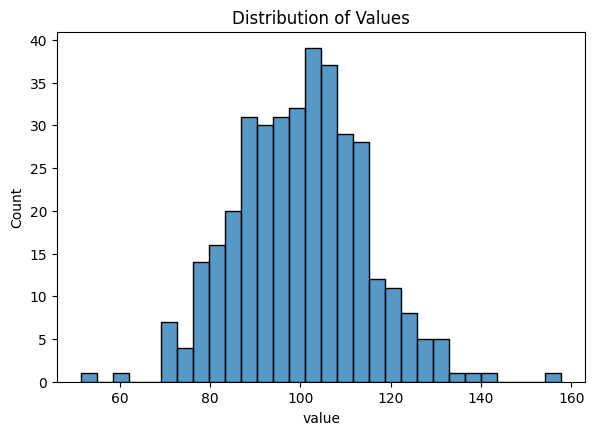

In [2]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Histogram
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='value', bins=30)
plt.title('Distribution of Values')

### b) **Box Plot (Box and Whisker)**

   - Shows data distribution through quartiles
   - Use when: Identifying outliers, comparing distributions across groups
   ```python
   # Basic boxplot
   plt.boxplot(data)
   
   # Using seaborn
   sns.boxplot(data=df, x='category', y='value')
   ```

Text(0.5, 1.0, 'Value Distribution by Category')

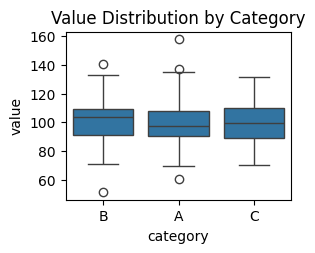

In [3]:
# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='category', y='value')
plt.title('Value Distribution by Category')

## 2. **Relationship Plots**
   
### a) **Scatter Plot**
   - Shows relationship between two numerical variables
   - Use when: Exploring correlations, identifying patterns
   ```python
   # Basic scatter plot
   plt.scatter(x_data, y_data)
   
   # Using seaborn
   sns.scatterplot(data=df, x='x_column', y='y_column')
   ```

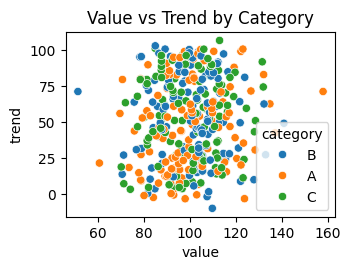

In [4]:
# 3. Scatter Plot
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='value', y='trend', hue='category')
plt.title('Value vs Trend by Category')

plt.tight_layout()
plt.show()

### b) **Line Plot**
   - Shows trends over time or sequential data
   - Use when: Time series analysis, trend visualization
   ```python
   # Basic line plot
   plt.plot(x_data, y_data)
   
   # Using seaborn
   sns.lineplot(data=df, x='time', y='value')
   ```

Text(0.5, 1.0, 'Trend Over Time')

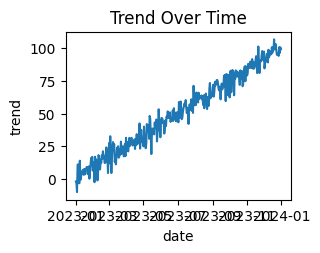

In [5]:
# 4. Time Series Line Plot
plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='date', y='trend')
plt.title('Trend Over Time')

## 3. **Comparison Plots**
   
### a) **Bar Plot**
   - Shows comparison between categories
   - Use when: Comparing quantities across different groups
   ```python
   # Basic bar plot
   plt.bar(categories, values)
   
   # Using seaborn
   sns.barplot(data=df, x='category', y='value')
   ```

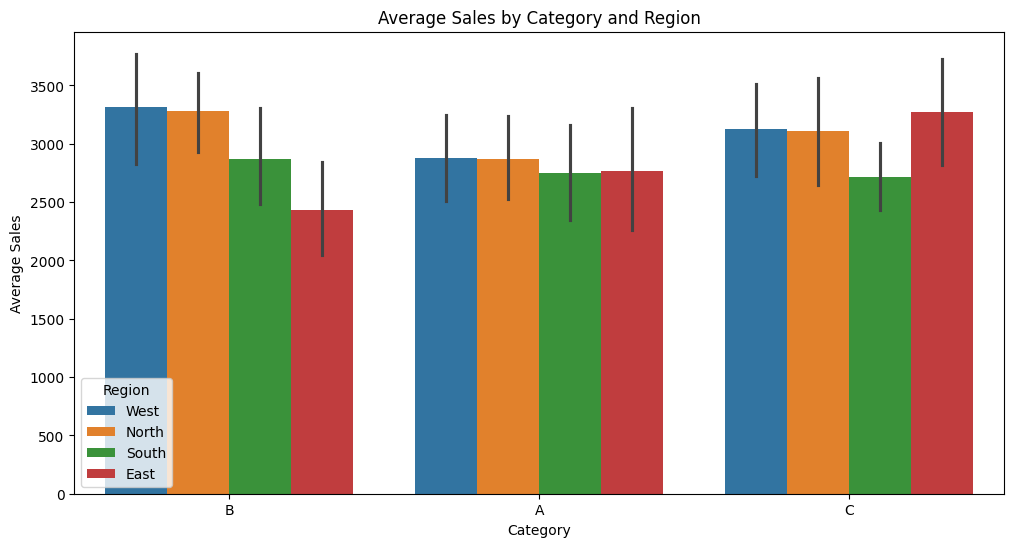

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='category', y='sales', hue='region')
plt.title('Average Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.legend(title='Region')
plt.show()

### b) **Pie Chart**
   - Shows parts of a whole
   - Use when: Displaying percentage distribution
   ```python
   plt.pie(sizes, labels=labels, autopct='%1.1f%%')
   ```

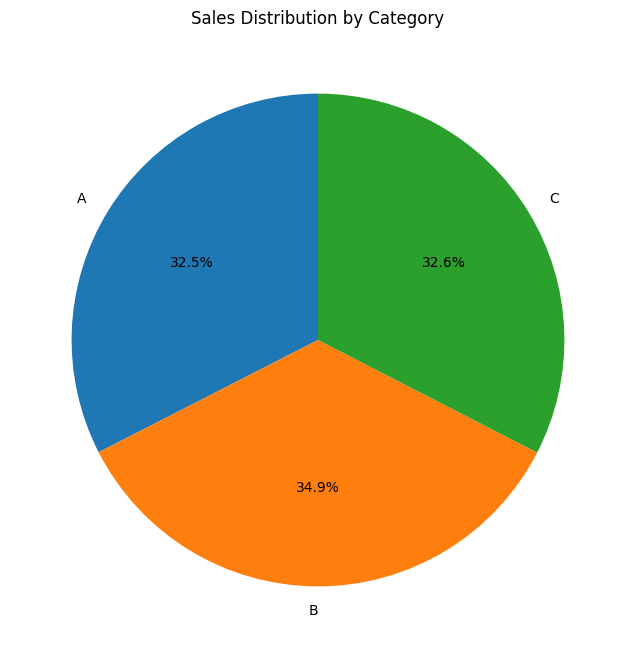

In [7]:
# 2. Pie Chart - Sales distribution by category
plt.figure(figsize=(10, 8))
sales_by_category = data.groupby('category')['sales'].sum()
plt.pie(sales_by_category, labels=sales_by_category.index, 
        autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.show()

## 4. **Statistical Plots**
   
### a) **Q-Q Plot**
   - Used to check if data follows a normal distribution
   - Use when: Testing normality assumptions
   ```python
   import statsmodels.api as sm
   
   sm.qqplot(data, line='45')
   plt.show()
   ```

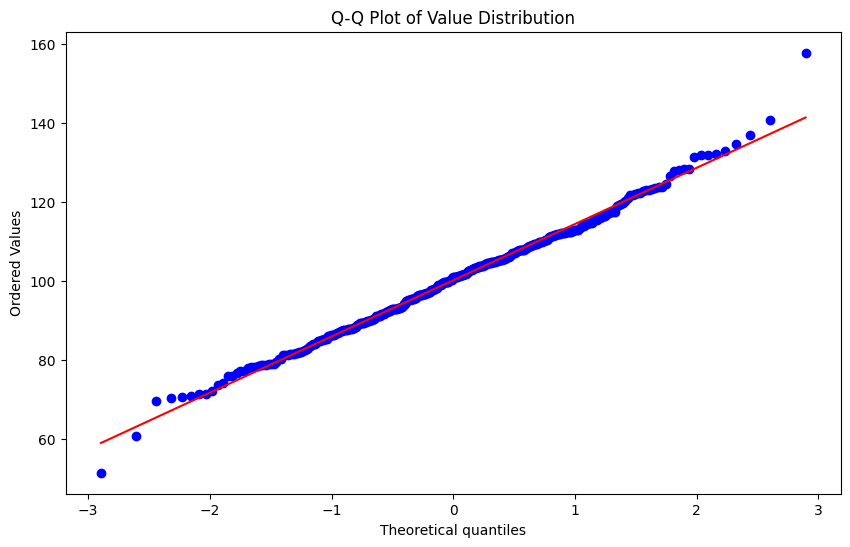

In [8]:
# 3. Q-Q Plot - Checking normality of value distribution
plt.figure(figsize=(10, 6))
stats.probplot(data['value'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Value Distribution')
plt.show()

### b) **Heatmap**
   - Shows correlation between multiple variables
   - Use when: Analyzing correlation matrices, visualizing large datasets
   ```python
   # Correlation heatmap
   sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
   ```

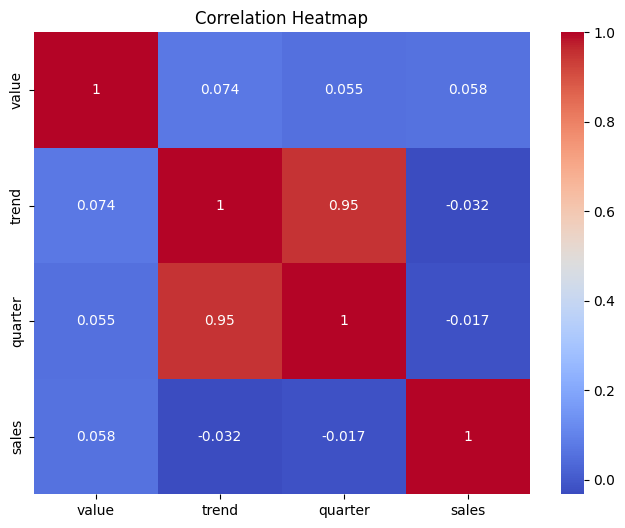

In [9]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
numeric_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5. **Advanced Plots**
   
### a) **Violin Plot**
   - Combines box plot with kernel density estimation
   - Use when: Showing distribution shape and summary statistics
   ```python
   sns.violinplot(data=df, x='category', y='value')
   ```

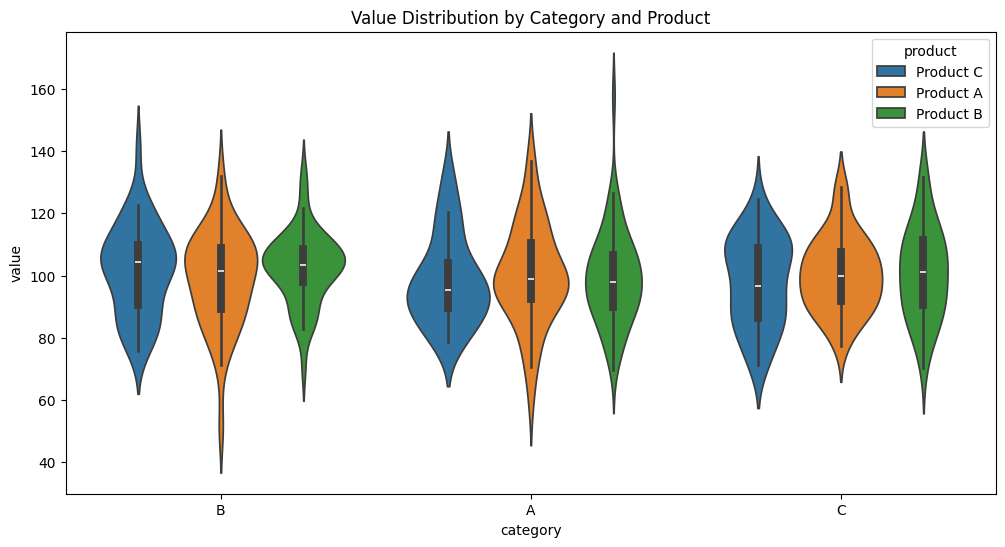

In [10]:
# 4. Violin Plot - Value distribution by category and product
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='category', y='value', hue='product')
plt.title('Value Distribution by Category and Product')
plt.show()

### b) **Facet Grid**
   - Creates multiple plots based on categories
   - Use when: Comparing patterns across different subgroups
   ```python
   g = sns.FacetGrid(df, col='category')
   g.map(plt.hist, 'value')
   ```

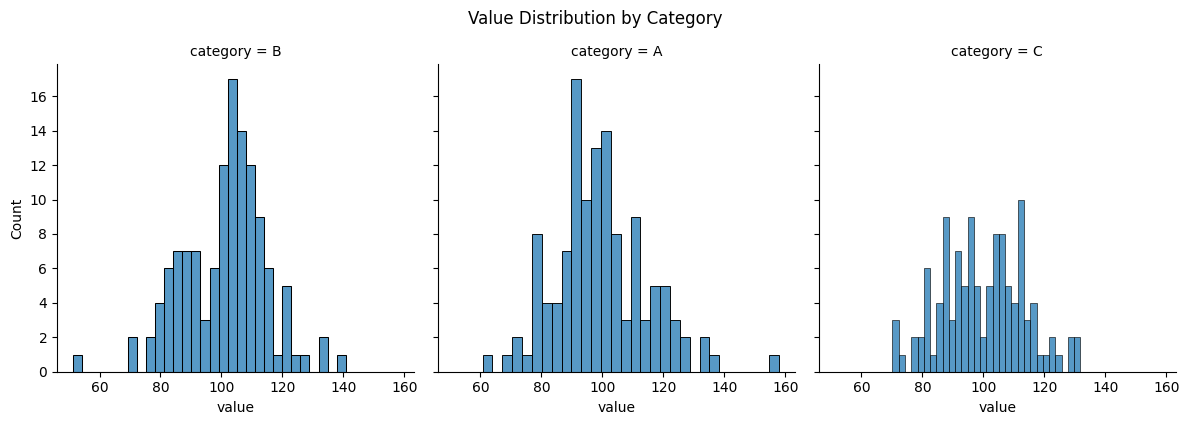

In [11]:
# 5. Facet Grid - Multiple plots by category
# Create a FacetGrid showing value distribution for each category
g = sns.FacetGrid(data, col='category', col_wrap=3, height=4)
g.map(sns.histplot, 'value', bins=30)
g.fig.suptitle('Value Distribution by Category', y=1.05)
plt.show()

----

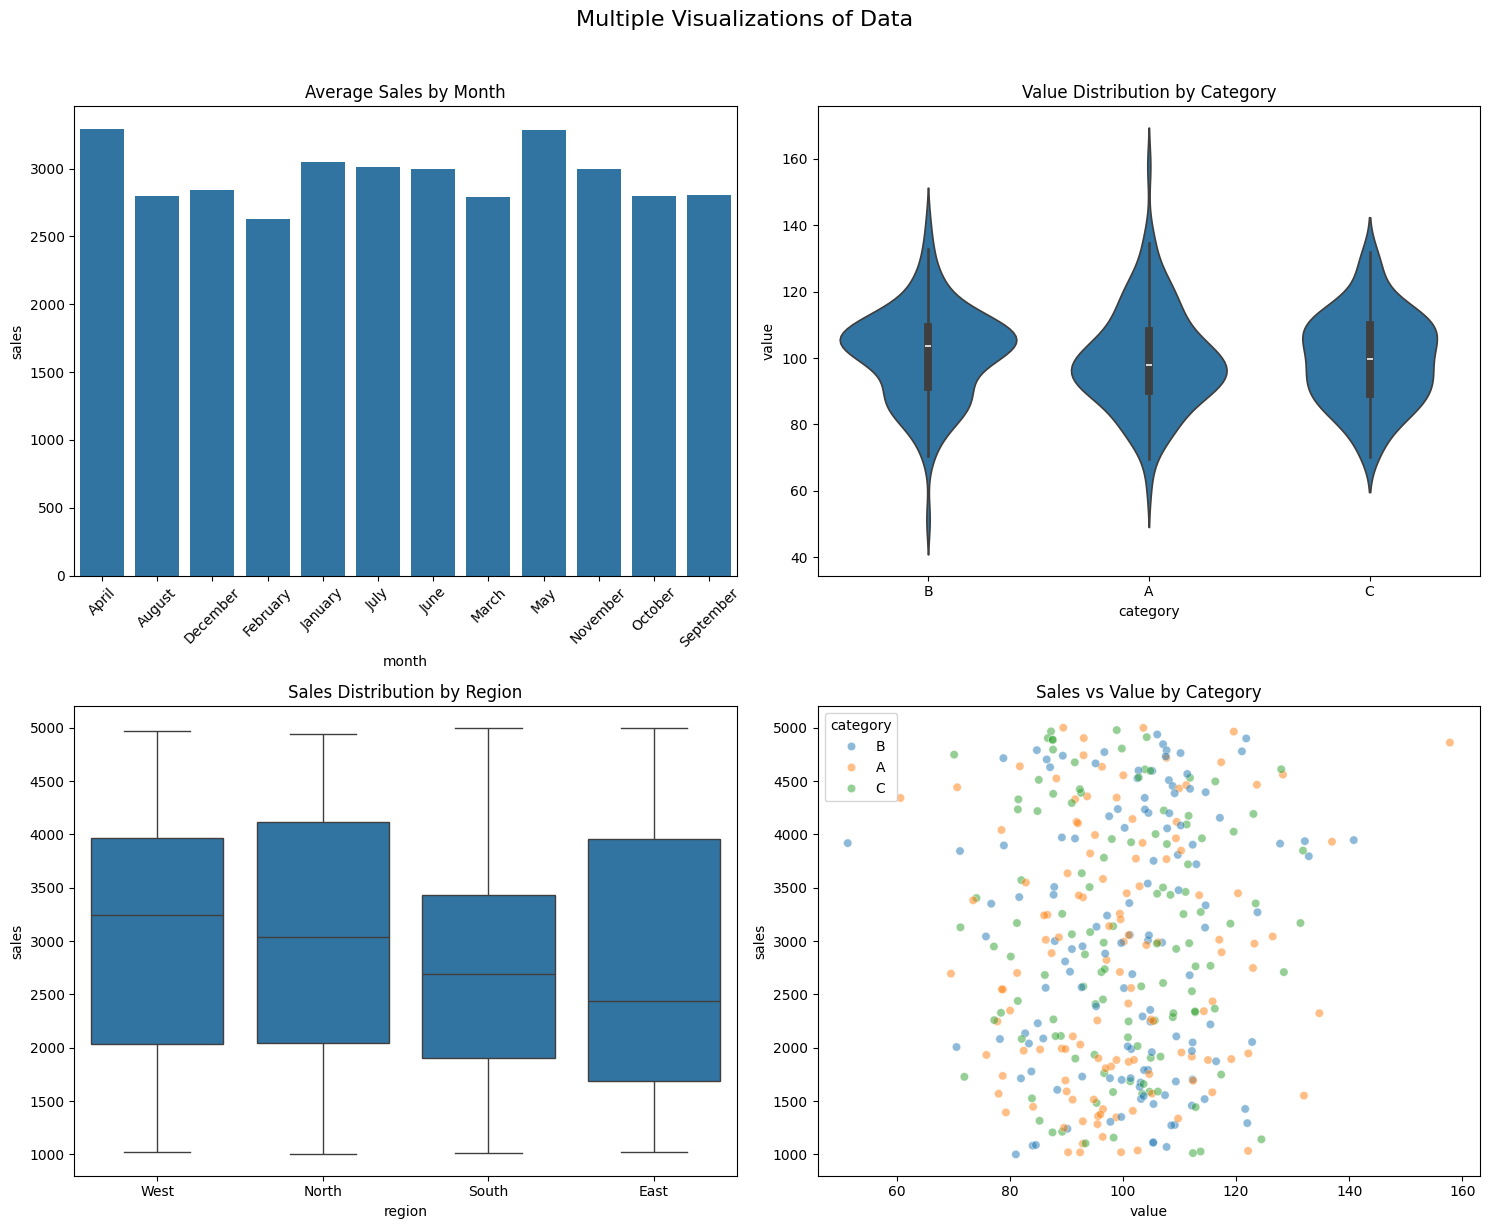


Statistical Summary:

Sales Summary by Category:
          count         mean          std     min      25%     50%      75%  \
category                                                                      
A         124.0  2817.411290  1174.738968  1020.0  1857.25  2729.0  3827.75   
B         126.0  2976.119048  1209.596380  1001.0  1812.25  2993.0  4059.75   
C         115.0  3040.478261  1130.168947  1013.0  2179.00  2980.0  4014.00   

             max  
category          
A         4999.0  
B         4936.0  
C         4977.0  

Value Summary by Region:
        count        mean        std        min        25%         50%  \
region                                                                   
East     82.0   99.492540  13.855691  51.380990  89.700438  101.416287   
North    99.0   99.785664  14.183444  60.703823  90.442751  101.047031   
South    94.0  100.511176  14.158759  69.622861  90.135703   99.396798   
West     90.0  100.769300  14.842851  70.604948  90.439928   99

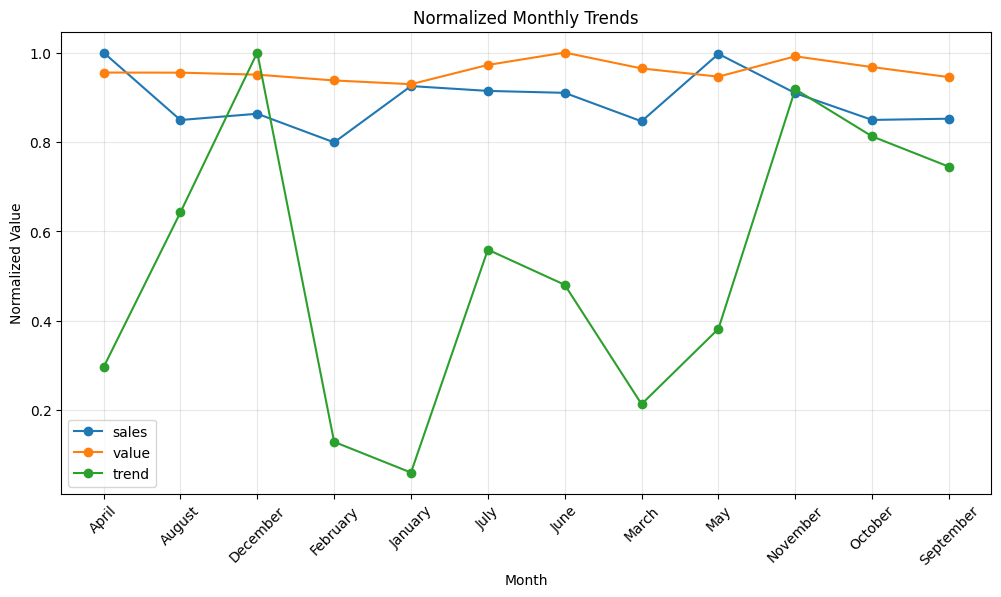

In [12]:
# 6. Combined Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Multiple Visualizations of Data', y=1.02, size=16)

# Top left - Bar plot
sns.barplot(data=data.groupby('month')['sales'].mean().reset_index(),
            x='month', y='sales', ax=axes[0,0])
axes[0,0].set_title('Average Sales by Month')
axes[0,0].tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0,0].tick_params(axis='x', rotation=45)

# Top right - Violin plot
sns.violinplot(data=data, x='category', y='value', ax=axes[0,1])
axes[0,1].set_title('Value Distribution by Category')

# Bottom left - Box plot
sns.boxplot(data=data, x='region', y='sales', ax=axes[1,0])
axes[1,0].set_title('Sales Distribution by Region')

# Bottom right - Scatter plot with trend
sns.scatterplot(data=data, x='value', y='sales', 
                hue='category', alpha=0.5, ax=axes[1,1])
axes[1,1].set_title('Sales vs Value by Category')

plt.tight_layout()
plt.show()

# 7. Statistical Summary
print("\nStatistical Summary:")
print("\nSales Summary by Category:")
print(data.groupby('category')['sales'].describe())

print("\nValue Summary by Region:")
print(data.groupby('region')['value'].describe())

# 8. Additional Analysis - Monthly Trends
monthly_stats = data.groupby('month').agg({
    'sales': 'mean',
    'value': 'mean',
    'trend': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
for column in ['sales', 'value', 'trend']:
    plt.plot(monthly_stats['month'], 
            monthly_stats[column]/monthly_stats[column].max(), 
            label=column, marker='o')
plt.title('Normalized Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

---

## 6. **Area Chart**
- Shows cumulative totals over time or categories
- Good for showing part-to-whole relationships over time

C:\Users\admin\AppData\Local\Temp\ipykernel_16668\469062988.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2023-01-01', '2023-12-31', freq='M')


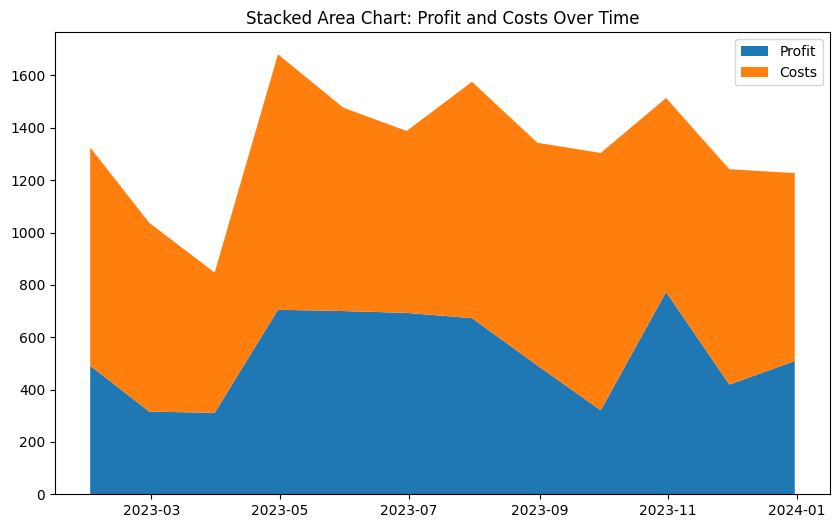

In [13]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
dates = pd.date_range('2023-01-01', '2023-12-31', freq='M')
data = pd.DataFrame({
    'date': dates,
    'revenue': np.random.randint(1000, 2000, len(dates)),
    'costs': np.random.randint(500, 1000, len(dates)),
    'profit': np.random.randint(300, 800, len(dates))
})

# Simple Area Chart
plt.figure(figsize=(10, 6))
plt.stackplot(data['date'], 
              [data['profit'], data['costs']], 
              labels=['Profit', 'Costs'])
plt.title('Stacked Area Chart: Profit and Costs Over Time')
plt.legend()
plt.show()


## 7. **Dot Graph (Strip Plot)**
- Shows individual data points as dots
- Useful for showing distribution and density

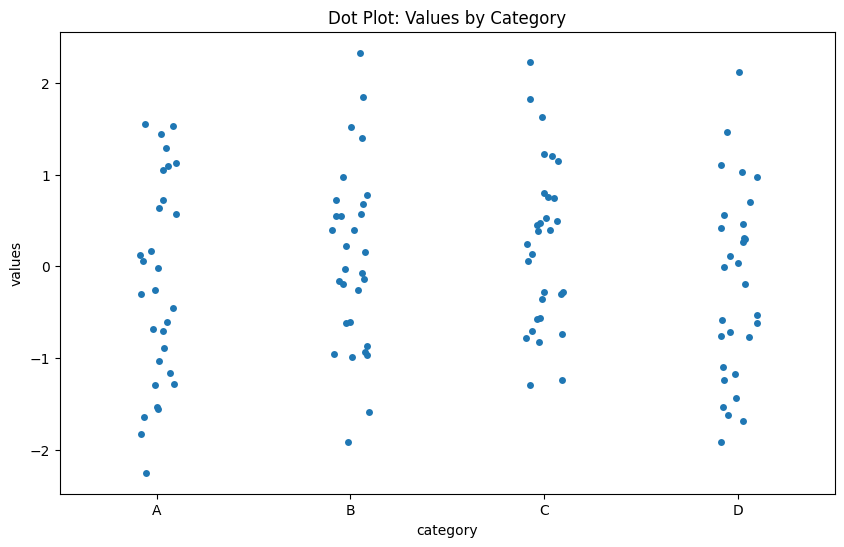

In [15]:
import seaborn as sns

# Create sample data
data = pd.DataFrame({
    'category': np.repeat(['A', 'B', 'C', 'D'], 30),
    'values': np.random.normal(0, 1, 120)
})

# Create dot plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='category', y='values', jitter=True)
plt.title('Dot Plot: Values by Category')
plt.show()

## 8. **Bubble Chart**
- Similar to scatter plot but with a third dimension shown by bubble size
- Good for showing relationships between three variables

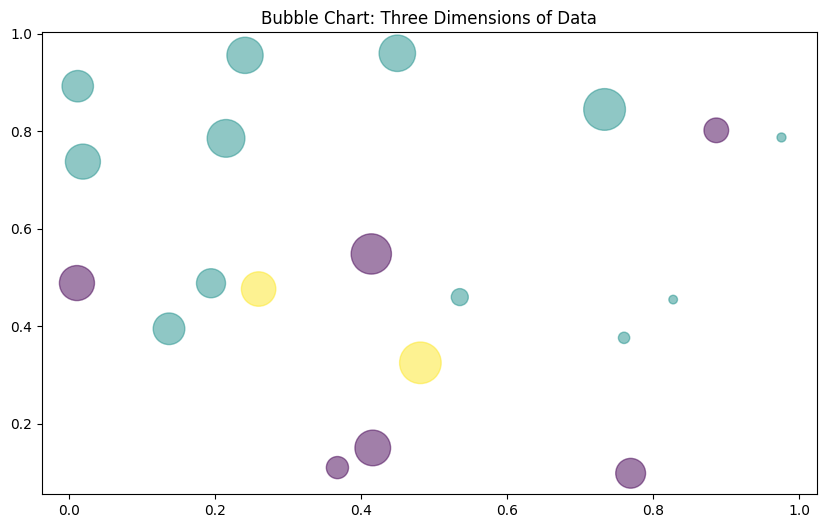

In [16]:
# Create sample data
data = pd.DataFrame({
    'x': np.random.rand(20),
    'y': np.random.rand(20),
    'size': np.random.rand(20) * 1000,
    'category': np.random.choice(['A', 'B', 'C'], 20)
})

# Create bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], s=data['size'], 
           alpha=0.5, c=pd.factorize(data['category'])[0])
plt.title('Bubble Chart: Three Dimensions of Data')
plt.show()

## 9. **Radar Chart (Spider/Star Chart)**
- Shows multivariate data on a circular graph
- Good for comparing multiple variables across categories

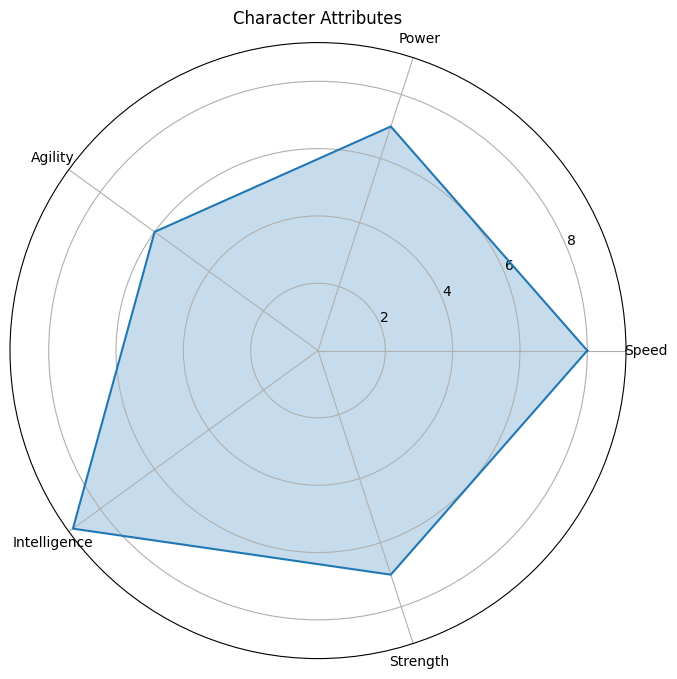

In [17]:
import numpy as np

def create_radar_chart(categories, values, title):
    # Number of variables
    num_vars = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories)
    
    # Plot data
    values = np.concatenate((values, [values[0]]))  # complete the loop
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.25)
    
    plt.title(title)
    return fig, ax

# Sample data
categories = ['Speed', 'Power', 'Agility', 'Intelligence', 'Strength']
values = [8, 7, 6, 9, 7]

create_radar_chart(categories, values, 'Character Attributes')
plt.show()

5. **Pictogram Graph**
- Uses icons to represent quantities
- Good for public-facing visualizations

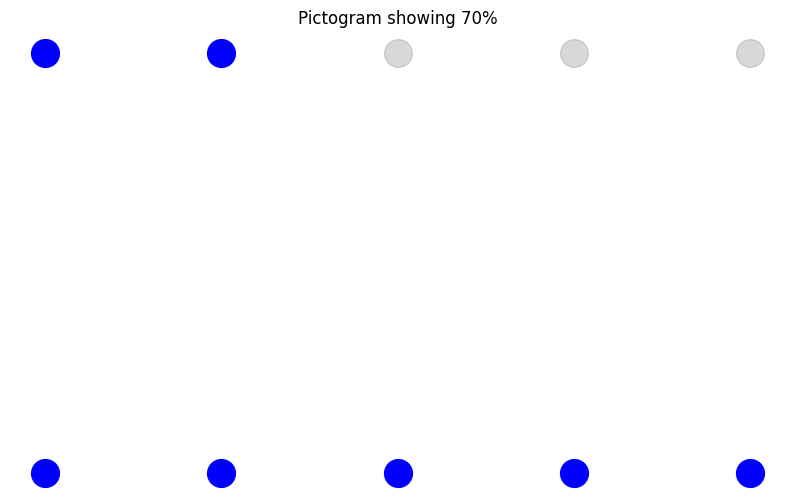

In [18]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import numpy as np

def create_pictogram(value, max_icons=10, cols=5):
    plt.figure(figsize=(10, 6))
    
    # Create a simple icon (circle in this case)
    x = np.arange(cols)
    y = np.arange(max_icons//cols)
    X, Y = np.meshgrid(x, y)
    
    # Plot filled and unfilled circles
    total_icons = X.size
    filled = int(value/100 * total_icons)
    
    for i in range(total_icons):
        if i < filled:
            plt.plot(X.flat[i], Y.flat[i], 'o', markersize=20, color='blue')
        else:
            plt.plot(X.flat[i], Y.flat[i], 'o', markersize=20, color='gray', alpha=0.3)
    
    plt.title(f'Pictogram showing {value}%')
    plt.axis('off')
    plt.show()

# Example usage
create_pictogram(70)


## 10. **Spline Chart**
- Shows smooth curves through data points
- Good for showing trends with smoother transitions

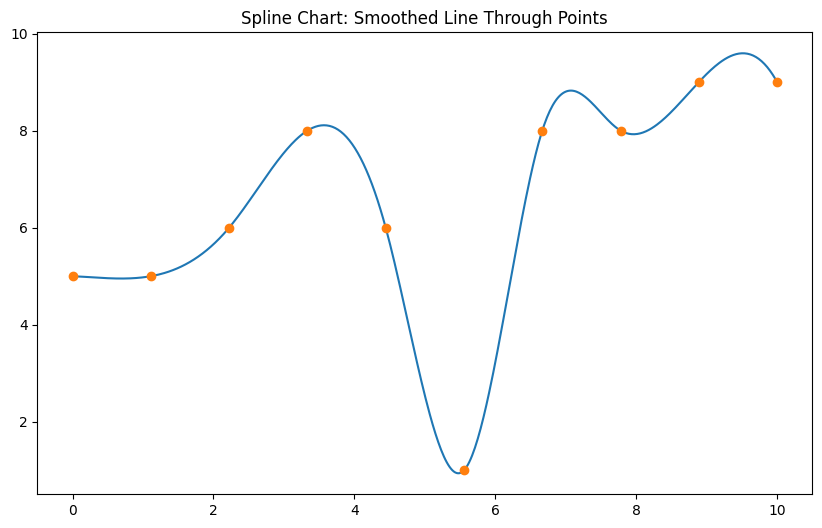

In [19]:
from scipy.interpolate import make_interp_spline

# Create sample data
x = np.linspace(0, 10, 10)
y = np.random.randint(1, 10, 10)

# Create spline
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, '-')
plt.plot(x, y, 'o')  # Original points
plt.title('Spline Chart: Smoothed Line Through Points')
plt.show()

---

# When to use which

Key considerations when choosing plots:
1. **Data Type**:
   - Categorical: Bar plots, pie charts
   - Continuous: Histograms, scatter plots, line plots
   - Time series: Line plots, area plots

2. **Analysis Goal**:
   - Distribution analysis: Histograms, box plots, violin plots
   - Relationship analysis: Scatter plots, line plots
   - Comparison analysis: Bar plots, pie charts
   - Correlation analysis: Heatmaps, scatter matrices

3. **Number of Variables**:
   - One variable: Histograms, box plots
   - Two variables: Scatter plots, line plots
   - Multiple variables: Heatmaps, pair plots, faceted plots

Remember to always:
- Include proper labels and titles
- Choose appropriate color schemes
- Consider the audience when selecting plot types
- Keep visualizations clean and uncluttered
- Use multiple plot types when necessary to convey different aspects of the data

---

1. **Distribution Plots**

   a) **Histogram**
   - When analyzing continuous data distribution
   - When looking for data skewness and kurtosis
   - When identifying outliers
   - Example uses: Age distribution, salary distribution, test scores

   b) **Box Plot**
   - When comparing distributions across groups
   - When identifying outliers
   - When showing summary statistics (median, quartiles)
   - Example uses: Comparing sales across regions, analyzing temperature variations

2. **Relationship Plots**

   a) **Scatter Plot**
   - When examining relationships between two continuous variables
   - When looking for correlations
   - When identifying clusters or patterns
   - Example uses: Height vs weight, price vs square footage, advertising vs sales

   b) **Line Plot**
   - When showing trends over time
   - When displaying continuous data changes
   - When comparing multiple series over time
   - Example uses: Stock prices, temperature changes, sales trends

3. **Comparison Plots**

   a) **Bar Plot**
   - When comparing quantities across categories
   - When showing frequency distributions
   - When displaying ranked data
   - Example uses: Sales by product, survey responses, market share

   b) **Pie Chart**
   - When showing parts of a whole (percentages)
   - When displaying simple proportions
   - When dealing with less than 6-7 categories
   - Example uses: Budget allocation, market share, demographic breakdown

4. **Composition Plots**

   a) **Area Chart**
   - When showing cumulative totals over time
   - When displaying part-to-whole relationships
   - When comparing multiple series' contributions
   - Example uses: Revenue streams over time, market share evolution

   b) **Stacked Bar Chart**
   - When showing both total and component parts
   - When comparing parts across categories
   - When displaying hierarchical data
   - Example uses: Sales breakdown by product line, expense categories

5. **Statistical Plots**

   a) **Q-Q Plot**
   - When checking data normality
   - When validating statistical assumptions
   - When comparing distributions
   - Example uses: Residual analysis, distribution testing

   b) **Heatmap**
   - When visualizing correlation matrices
   - When showing patterns in large datasets
   - When displaying temporal patterns
   - Example uses: Correlation analysis, website traffic patterns

6. **Advanced Visualization**

   a) **Bubble Chart**
   - When comparing three variables
   - When size matters in comparison
   - When showing proportional relationships
   - Example uses: Population data, economic indicators, market analysis

   b) **Radar Chart**
   - When comparing multiple variables across entities
   - When showing performance metrics
   - When displaying balanced scorecards
   - Example uses: Skills assessment, product comparison, performance evaluation

7. **Specialized Plots**

   a) **Dot Graph**
   - When showing individual data points
   - When displaying distribution density
   - When comparing categories with few data points
   - Example uses: Individual scores, small sample comparisons

   b) **Pictogram Graph**
   - When presenting to general audience
   - When making statistics more accessible
   - When creating infographics
   - Example uses: Survey results, public presentations

8. **Technical Plots**

   a) **Spline Chart**
   - When smoothing noisy data
   - When interpolating between points
   - When showing continuous trends
   - Example uses: Scientific data, trend analysis, forecasting

9. **Combination Plots**

   a) **Violin Plot**
   - When combining distribution and summary statistics
   - When comparing distributions across groups
   - When showing probability density
   - Example uses: Income distribution, test score analysis

10. **Decision Making Criteria**

    Consider these factors when choosing a plot:

    a) **Data Type**
    - Categorical: Bar, pie, dot plots
    - Continuous: Line, scatter, histogram
    - Time series: Line, area charts
    - Proportional: Pie, stacked bar charts

    b) **Number of Variables**
    - One variable: Histogram, box plot
    - Two variables: Scatter plot, line chart
    - Three variables: Bubble chart, 3D plots
    - Multiple variables: Radar chart, heatmap

    c) **Analysis Goal**
    - Distribution: Histogram, box plot, violin plot
    - Comparison: Bar chart, dot plot
    - Relationship: Scatter plot, bubble chart
    - Composition: Pie chart, stacked area chart
    - Trend: Line chart, spline chart

    d) **Audience**
    - Technical: Q-Q plots, statistical charts
    - General: Pictograms, simple bar charts
    - Executive: Dashboard combinations
    - Academic: Detailed statistical plots

11. **Best Practices**

    a) **Data Volume**
    - Small data: Dot plots, pictograms
    - Medium data: Bar charts, line charts
    - Large data: Heatmaps, density plots

    b) **Comparison Type**
    - Over time: Line, area charts
    - Between categories: Bar, dot plots
    - Parts of whole: Pie, stacked charts
    - Distributions: Box, violin plots

    c) **Message Focus**
    - Patterns: Line, scatter plots
    - Rankings: Bar charts
    - Distribution: Histograms
    - Relationships: Scatter, bubble charts


---

1. **Area Chart**
   - Showing cumulative totals over time
   - Displaying part-to-whole relationships
   - Comparing multiple series over time

2. **Dot Graph**
   - Showing distribution of individual data points
   - Comparing distributions across categories
   - Identifying clusters and patterns

3. **Bubble Chart**
   - Comparing three variables simultaneously
   - Showing relationships with size component
   - Visualizing market analysis or population data

4. **Radar Chart**
   - Comparing multiple variables for multiple items
   - Performance analysis
   - Skills assessment
   - Product comparison

5. **Pictogram Graph**
   - Public presentations
   - Infographics
   - Making statistics more accessible
   - Showing percentages or proportions

6. **Spline Chart**
   - Smoothing noisy data
   - Showing trends with continuous curves
   - Interpolating between data points
   - Making forecasts or projections

Best Practices:

1. **For Area Charts:**
   - Don't stack too many categories
   - Use contrasting colors
   - Consider using transparency

2. **For Dot Graphs:**
   - Add jitter to prevent overlap
   - Use appropriate dot sizes
   - Consider adding summary statistics

3. **For Bubble Charts:**
   - Limit the number of bubbles
   - Use size variations meaningfully
   - Include a size legend

4. **For Radar Charts:**
   - Limit to 5-10 variables
   - Start at 12 o'clock position
   - Use consistent scales

5. **For Pictogram Graphs:**
   - Use simple, recognizable icons
   - Maintain consistent spacing
   - Don't use too many icons

6. **For Spline Charts:**
   - Don't oversmooth the data
   - Show original data points
   - Use appropriate interpolation methods